## ROI analysis for 
1 randomly every day between 4 and 47
#### Parameters
number of electrolysers:1 and 2.  number of canisters: 1-150
###### The results from this analysis can be found at 
'ROIResults/Analysis[4].csv'

In [1]:
'''
import general python libraries
'''
import StationV5 as Station
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
'''
import project specific libraries
'''
import Prices

In [3]:
station1 = Station.Station()

In [12]:
hgv_per_day = 1
dispenser_time_demand_array = np.zeros([365,hgv_per_day])

for day in range(1,366):
    my_list = []
    for n in range(hgv_per_day):
        rand = random.randint(4,47)
        my_list.append(rand)
    my_list.sort()
    dispenser_time_demand_array[day-1] = my_list
dispenser_time_demand_array = dispenser_time_demand_array.astype(int)

dispenser_time_demand = dispenser_time_demand_array[0].tolist()

In [13]:
ROI_array = np.zeros([2,30])

'''
-------------------------------------------------------------------------------------------------------
'''
for i in range(len(ROI_array)):
    for j in range(len(ROI_array[0])):
        
#         if i ==0:
#             n_electrolysers = 1
#         if i==1:
#             n_electrolysers = 2
#         if i==2:
#             n_electrolysers = 16
        n_electrolysers = i+1
        n_canisters = j+1

        electrolyser_capacity = n_electrolysers * 22.125
        storage_capacity = n_canisters * 9.5



        total_cost = np.zeros(365)
        unsatisfaction = np.zeros(365)

        '''
        -------------------------------------------------------------------------------------------------------
        '''
        for n in range(365):
            day = n+1

            starting_storage_level = 0
            elec_price = Prices.elec_prices_data(day)
            
            dispenser_time_demand = dispenser_time_demand_array[n].tolist()


            demand, level, unsatisfied = station1.get_optimised_electrolyser_demand(elec_price, dispenser_time_demand, starting_storage_level,electrolyser_capacity,storage_capacity)

            # convert from demand in kg to kWh
            demand = demand*49.465
            # convert electricity prices into pounds
            elec_price = elec_price/100
            # find the cost of the refill
            cost = np.dot(demand,elec_price)

            total_cost[day-1] = cost
            unsatisfaction[day-1] = unsatisfied
            
            if unsatisfied >= 1:
                break

        avg_refill_cost = (np.average(total_cost))/(len(dispenser_time_demand))
        if np.sum(unsatisfaction) > 0:
            feasible = 0
        else:
            feasible = 1
        '''
        --------------------------------------------------------------------------------------------------------
        '''

        capital_cost = n_electrolysers*3200000 + n_canisters*5000
        yearly_return = (169.36-avg_refill_cost)*len(dispenser_time_demand)*365

        if feasible == 1:
            ROI = (yearly_return/capital_cost)*100
        else: 
            ROI = 0

        
        ROI_array[i][j] = ROI
        
        print(i,j)
        '''
        -------------------------------------------------------------------------------------------------------
        '''


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29


Text(16, 1.4, '1 Vehicle Randomly per Day             Max ROI = 1.1589%')

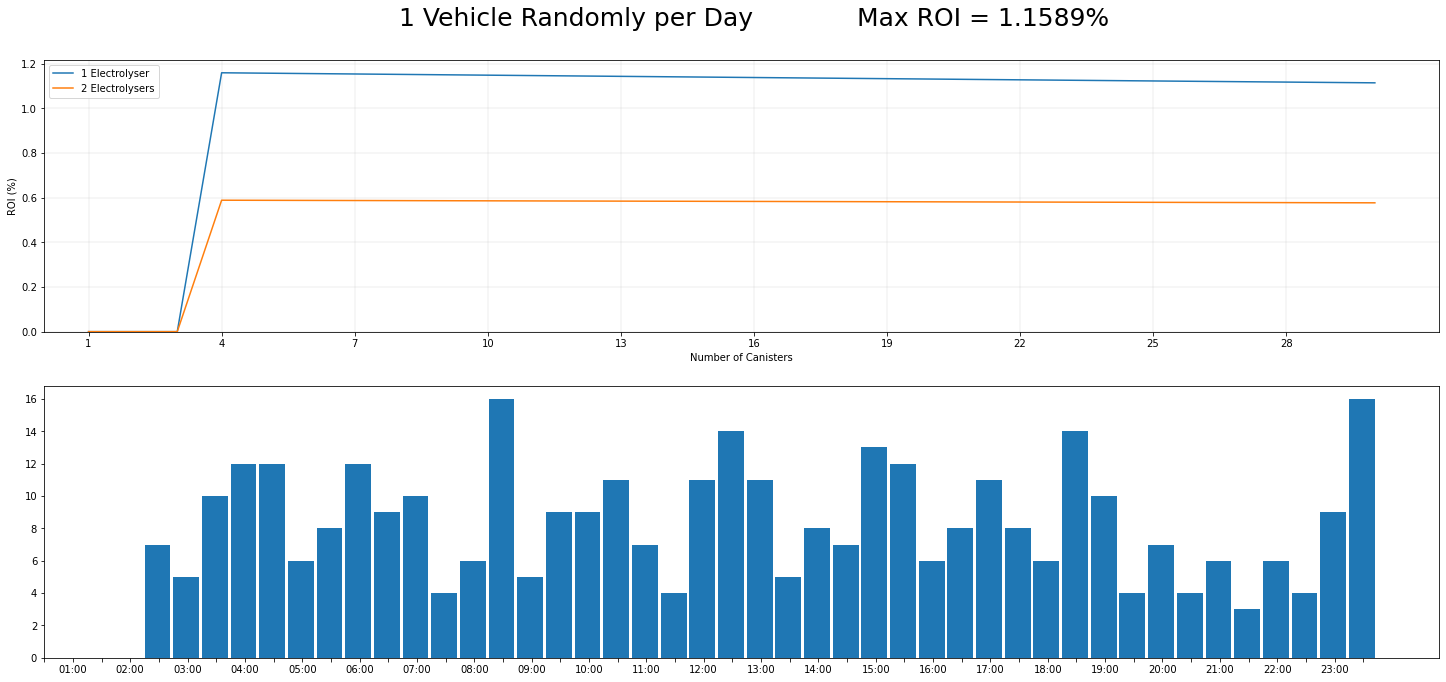

In [49]:
n = [n for n in range(1,len(ROI_array[0])+1)]
# n = [n for n in range(1,43)]

fig, ax = plt.subplots(nrows=2,figsize=[25,11])

my_xticks = [n for n in range(1,len(ROI_array[0]),3)]
my_xtick_labels = [n for n in range(1,len(ROI_array[0]),3)]
ax[0].set_xticks(my_xticks)
ax[0].set_xticklabels(my_xtick_labels)

ax[0].plot(n,ROI_array[0],label='1 Electrolyser')
ax[0].plot(n,ROI_array[1],label='2 Electrolysers')
# ax.plot(n,ROI_array[2],label='16 Electrolysers')

ax[0].set_ylabel('ROI (%)')
ax[0].set_xlim(0)
ax[0].set_ylim(0)
ax[0].set_xlabel('Number of Canisters')
ax[0].legend()
ax[0].grid(lw=0.2)

ax[1].hist(dispenser_time_demand_array, bins=[n for n in range(4,48)],width=0.9, align='right')
my_xticks = [n for n in range(1,48,1)]
my_xtick_labels = ['','01:00','','02:00','','03:00','','04:00','','05:00','','06:00','','07:00','','08:00','','09:00','','10:00','','11:00','','12:00','','13:00','','14:00','','15:00','','16:00','','17:00','','18:00','','19:00','','20:00','','21:00','','22:00','','23:00','']
ax[1].set_xticks(my_xticks)
ax[1].set_xticklabels(my_xtick_labels)

ax[0].text(16,1.4,(str(hgv_per_day)+' Vehicle Randomly per Day             Max ROI = '+str(round(np.max(ROI_array),4))+'%'),fontsize=25,
     horizontalalignment='center',
     verticalalignment='center')

In [20]:
import pandas as pd

df = pd.DataFrame(ROI_array)

df.to_csv('ROIResults/Analysis[4].csv')

In [46]:
np.max(ROI_array)

1.1589100051823447